In [1]:
# import required libraries to munge data
import pandas as pd
import numpy as np
import os

In [11]:
import scipy
import scipy.spatial

In [2]:
# import matplotlib to draw plot inside of notebook
%matplotlib inline
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
all_table = pd.read_csv("../../log/revised-epoch-summary.csv", header=0)
#all_table = pd.read_csv("../../log/random-fine1-20epochs.csv", header=0)
all_table.head(5)

,Unnamed: 0,Timestamp,Msec,Setting,Measure Type,Step,Epoch,Elapsed Time,Test Error,Validation Error,Training Error,filter_size,conv1_depth,conv2_depth,fc1_width
0,0,2016-10-28 23:54:59,529,/root/tf-hpolib/tf-hpo/src/config/Grid_1477666...,epoch,859,1.0,8.92,0.0332,0.0404,NaN,3,50,50,128
1,1,2016-10-28 23:55:04,190,/root/tf-hpolib/tf-hpo/src/config/Grid_1477666...,epoch,1718,2.0,13.60,0.0182,0.0214,NaN,3,50,50,128
2,2,2016-10-28 23:55:08,851,/root/tf-hpolib/tf-hpo/src/config/Grid_1477666...,epoch,2577,3.0,18.20,0.0157,0.0178,NaN,3,50,50,128
3,3,2016-10-28 23:55:13,516,/root/tf-hpolib/tf-hpo/src/config/Grid_1477666...,epoch,3436,4.0,22.90,0.0138,0.0154,NaN,3,50,50,128
4,4,2016-10-28 23:55:18,199,/root/tf-hpolib/tf-hpo/src/config/Grid_1477666...,epoch,4295,5.0,27.60,0.0126,0.0152,NaN,3,50,50,128


In [4]:
from math import log
def log_scale(table, base=10):
    """apply log2 function to all list item"""
    list = table.values.tolist()
    for i in range(len(list)):
        list[i] = log(list[i], base)
    return list

In [5]:
sorted_table = all_table.sort_values(['Setting']).reset_index(drop=True)
epoch_only = sorted_table[sorted_table["Measure Type"] == 'epoch']
epoch_tables = [None,] # for index matchinf

for i in range(20):
    num_epoch = i + 1
    epoch_table = epoch_only[epoch_only["Epoch"] == num_epoch]
    epoch_tables.append(epoch_table)

In [6]:
epoch_tables[7].describe()

/usr/local/lib/python2.7/dist-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,Msec,Step,Epoch,Elapsed Time,Test Error,Validation Error,Training Error,filter_size,conv1_depth,conv2_depth,fc1_width
count,4000.000000,4000.000000,4000.0,4000.0,4000.000000,4000.000000,4000.000000,0.0,4000.000000,4000.000000,4000.000000,4000.000000
mean,39996.000000,499.207500,6013.0,7.0,353.289525,0.441605,0.438420,NaN,7.000000,275.000000,275.000000,576.000000
std,23096.897339,289.347645,0.0,0.0,248.677184,0.442247,0.442737,NaN,2.828781,143.632021,143.632021,293.321512
min,6.000000,0.000000,6013.0,7.0,36.800000,0.006500,0.001600,NaN,3.000000,50.000000,50.000000,128.000000
25%,20001.000000,245.750000,6013.0,7.0,163.000000,0.010200,0.006400,NaN,5.000000,150.000000,150.000000,352.000000
50%,39996.000000,501.000000,6013.0,7.0,275.000000,0.024400,0.021700,NaN,7.000000,275.000000,275.000000,576.000000
75%,59991.000000,751.000000,6013.0,7.0,485.000000,0.897200,0.896000,NaN,9.000000,400.000000,400.000000,800.000000
max,79986.000000,999.000000,6013.0,7.0,1310.000000,0.902000,0.896000,NaN,11.000000,500.000000,500.000000,1024.000000


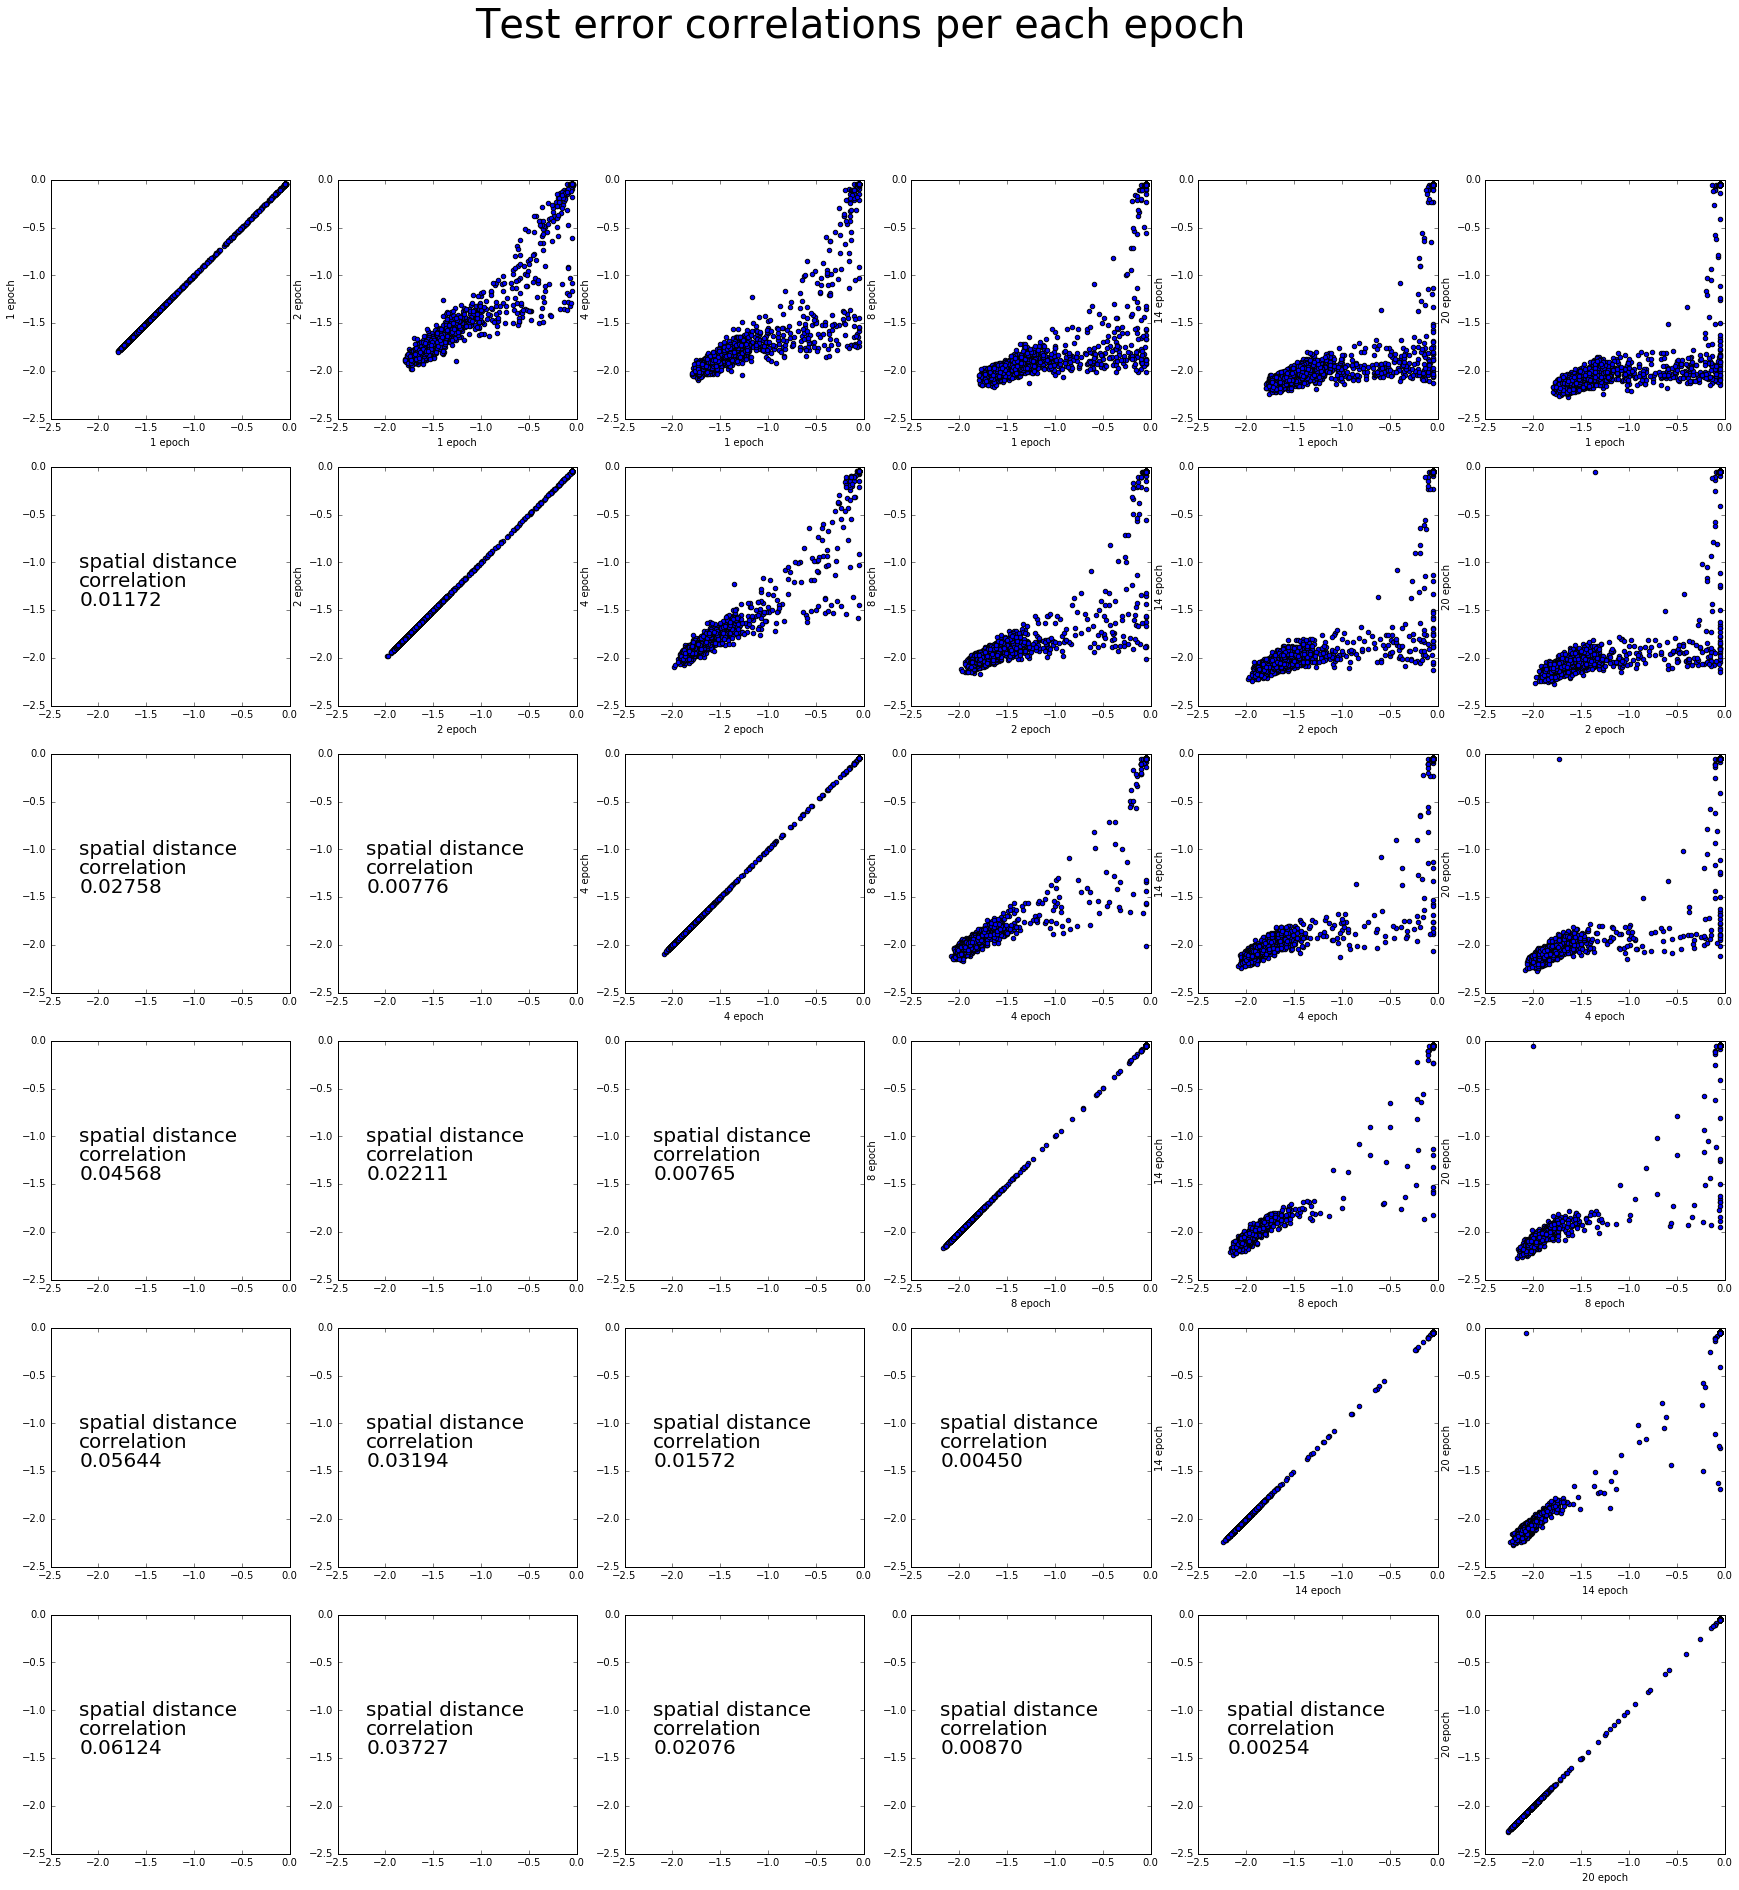

In [22]:
epochs = [1, 2, 4, 8, 14, 20]

fig_index = 1
fig = plt.figure(num=None, figsize=(30, 30), dpi=150, facecolor='w', edgecolor='k')
fig.suptitle("Test error correlations per each epoch", fontsize=40)
for i in range(len(epochs)):
    for j in range(len(epochs)):
        subplot = fig.add_subplot(len(epochs), len(epochs), fig_index)
        subplot.set_ylim([-2.5, 0])
        subplot.set_xlim([-2.5, 0])
        fig_index += 1 
        x_epoch = epochs[i]
        y_epoch = epochs[j]
        x = log_scale(epoch_tables[x_epoch]["Test Error"])
        y = log_scale(epoch_tables[y_epoch]["Test Error"])
        distance = scipy.spatial.distance.correlation(x,  y)
        
        if (i <= j) :
            plt.scatter(x, y)
            plt.xlabel(str(x_epoch) + " epoch")
            plt.ylabel(str(y_epoch) + " epoch")
        else:
            #print str(x_epoch) + ", "+ str(y_epoch) + " -> " + str(distance)
            subplot.text(-2.2, -1, "spatial distance", va='center', fontsize=20)
            subplot.text(-2.2, -1.2, "correlation", va='center', fontsize=20)
            subplot.text(-2.2, -1.4, "%.5f" % distance, va='center', fontsize=20)
        
plt.show()

In [23]:
fig.savefig("correlations_per_epoch.png", format='png', dpi=200, show=False)